In [74]:
# # Load the Drive helper and mount
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
#importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, SimpleRNN
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Omkar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Omkar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Omkar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
df_reddit = pd.read_csv('Reddit_Data.csv')
df_twitter = pd.read_csv('Twitter_Data.csv')

In [6]:
df_twitter.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [7]:
df_reddit.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [8]:
df_twitter.rename(columns = {'clean_text':'clean_comment'}, inplace = True)

In [9]:
df_twitter.shape,  df_reddit.shape

((162980, 2), (37249, 2))

In [10]:
df = df_reddit.append(df_twitter).reset_index(drop=True)

In [11]:
df.shape

(200229, 2)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200229 entries, 0 to 200228
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   clean_comment  200125 non-null  object 
 1   category       200222 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.1+ MB


In [13]:
df.isna().sum()

clean_comment    104
category           7
dtype: int64

In [14]:
df.dropna(inplace=True)

In [15]:
#Renaming Target Labels to increase the visual meaning while exploring the data
def rename(val):
    if val == -1:
        return "Negative"
    elif val == 0:
        return "Neutral"
    elif val == 1:
        return "Positive"

In [16]:
df['category'] = df['category'].apply(rename)

<Axes: xlabel='category', ylabel='count'>

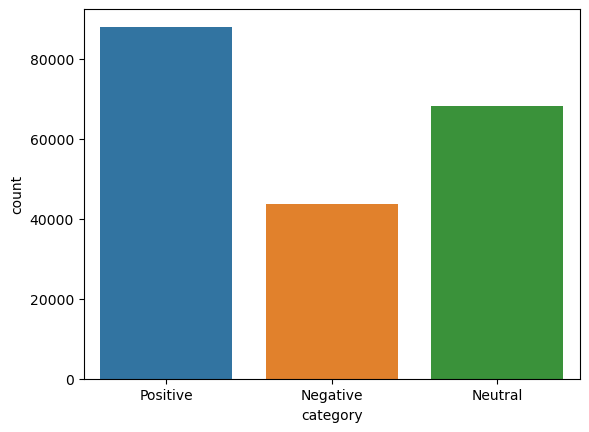

In [17]:
sns.countplot(x = df['category'])

In [18]:
empty=[]
for idx,clean_comment,category in df.itertuples():
    if type(clean_comment)==str:
        if clean_comment.isspace():
            empty.append(idx)
print(empty)

[181, 375, 392, 651, 1222, 1528, 1835, 1975, 2339, 2446, 2588, 2780, 2796, 3252, 3617, 3649, 3939, 3987, 4396, 4415, 4417, 4431, 4432, 4786, 8046, 10323, 10592, 10618, 10621, 10626, 10630, 10929, 11118, 11467, 11825, 11958, 12775, 12857, 13169, 13296, 13409, 13573, 13583, 14207, 14460, 14805, 14815, 15385, 15442, 15832, 16173, 16276, 16309, 16406, 16537, 16652, 17200, 17394, 17876, 18133, 18342, 18882, 19029, 19498, 19598, 20987, 21123, 21433, 22316, 22815, 22877, 22971, 23127, 23618, 23658, 23834, 23861, 23862, 24568, 24752, 25107, 25296, 25570, 26188, 26230, 26864, 27102, 27405, 27529, 27580, 28073, 28086, 29168, 29387, 29544, 29844, 29882, 30059, 31448, 31748, 32149, 32355, 32474, 32522, 32991, 33356, 33441, 33600, 33799, 33953, 33982, 33985, 34415, 34915, 34935, 34959, 35711, 35778, 35987, 36707, 37044, 114473]


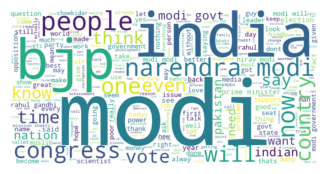

In [22]:
from wordcloud import WordCloud
titles = ' '.join(title for title in df['clean_comment'])
wordcloud = WordCloud(
    background_color='white',
    max_words=300,
    width=800,
    height=400,
).generate(titles)

plt.figure(figsize=(5,2))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [73]:
df.drop(empty,inplace=True)

In [23]:
def clean_text(msg):
    token = word_tokenize(msg.lower())
    ftoken = [i for i in token if i.isalpha()]

    stop = stopwords.words('english')
    stoken = [i for i in ftoken if i not in stop]

    lemma = WordNetLemmatizer()
    ltoken = [lemma.lemmatize(i) for i in stoken]

    return ' '.join(ltoken)

In [24]:
df['clean_comment']=df['clean_comment'].apply(clean_text)

In [25]:
df.head()

,clean_comment,category
0,family mormon never tried explain still stare ...,Positive
1,buddhism much lot compatible christianity espe...,Positive
2,seriously say thing first get complex explain ...,Negative
3,learned want teach different focus goal wrappi...,Neutral
4,benefit may want read living buddha living chr...,Positive


In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['category']=le.fit_transform(df['category'])

In [69]:
x = df['clean_comment']
y = df['category']

In [70]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=1)

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer(min_df=0.02)
xtrain = tvec.fit_transform(xtrain).toarray()
xtest = tvec.transform(xtest).toarray()

In [72]:
# from sklearn.feature_extraction.text import CountVectorizer
# cvec = CountVectorizer(min_df=0.02)
# xtrain = cvec.fit_transform(xtrain).toarray()
# xtest = cvec.transform(xtest).toarray()

In [73]:
ann = Sequential()

ann.add(Dense(units=32,activation='tanh'))
ann.add(Dropout(rate=0.20))

ann.add(Dense(units=24,activation='relu'))
ann.add(Dropout(rate=0.20))

ann.add(Dense(units=12,activation='relu'))
ann.add(Dropout(rate=0.20))

ann.add(Dense(units=3,activation='softmax'))

ann.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
ann.fit(xtrain,ytrain,batch_size=50,epochs=25,validation_split=0.20)

Epoch 1/25
2242/2242 [==============================] - 4s 2ms/step - loss: 0.9654 - accuracy: 0.5181 - val_loss: 0.9312 - val_accuracy: 0.5372
Epoch 2/25
2242/2242 [==============================] - 3s 1ms/step - loss: 0.9432 - accuracy: 0.5329 - val_loss: 0.9318 - val_accuracy: 0.5343
Epoch 3/25
2242/2242 [==============================] - 3s 1ms/step - loss: 0.9394 - accuracy: 0.5345 - val_loss: 0.9277 - val_accuracy: 0.5350
Epoch 4/25
2242/2242 [==============================] - 3s 2ms/step - loss: 0.9383 - accuracy: 0.5368 - val_loss: 0.9281 - val_accuracy: 0.5381
Epoch 5/25
2242/2242 [==============================] - 3s 1ms/step - loss: 0.9374 - accuracy: 0.5370 - val_loss: 0.9290 - val_accuracy: 0.5364
Epoch 6/25
2242/2242 [==============================] - 3s 2ms/step - loss: 0.9366 - accuracy: 0.5382 - val_loss: 0.9262 - val_accuracy: 0.5361
Epoch 7/25
2242/2242 [==============================] - 3s 1ms/step - loss: 0.9347 - accuracy: 0.5389 - val_loss: 0.9272 - val_accuracy:

In [75]:
ypred = ann.predict(xtest)
ypred = ypred.argmax(axis=1)

1877/1877 [==============================] - 2s 867us/step


In [76]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.41      0.02      0.04     13124
           1       0.50      0.75      0.60     20447
           2       0.59      0.64      0.61     26465

    accuracy                           0.54     60036
   macro avg       0.50      0.47      0.42     60036
weighted avg       0.52      0.54      0.48     60036



In [35]:
df.head()

,clean_comment,category
0,family mormon never tried explain still stare ...,2
1,buddhism much lot compatible christianity espe...,2
2,seriously say thing first get complex explain ...,0
3,learned want teach different focus goal wrappi...,1
4,benefit may want read living buddha living chr...,2


In [36]:
#spliting data into x and y
x = df['clean_comment']
y = df['category']

In [37]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.30,random_state=1)

In [38]:
sentlen = []
for i in df['clean_comment']:
    sentlen.append(len(word_tokenize(i)))
df['Sentlen'] = sentlen

In [39]:
df.head()

,clean_comment,category,Sentlen
0,family mormon never tried explain still stare ...,2,26
1,buddhism much lot compatible christianity espe...,2,137
2,seriously say thing first get complex explain ...,0,46
3,learned want teach different focus goal wrappi...,1,14
4,benefit may want read living buddha living chr...,2,67


In [40]:
max(sentlen)

866

In [41]:
min(sentlen)

0

In [42]:
max_len = np.quantile(sentlen,0.90)

In [43]:
tok = Tokenizer(char_level=False,split=' ')
tok.fit_on_texts(xtrain)
tok.index_word

{1: 'modi',
 2: 'india',
 3: 'people',
 4: 'bjp',
 5: 'like',
 6: 'congress',
 7: 'one',
 8: 'election',
 9: 'vote',
 10: 'indian',
 11: 'narendra',
 12: 'time',
 13: 'year',
 14: 'say',
 15: 'country',
 16: 'govt',
 17: 'get',
 18: 'even',
 19: 'know',
 20: 'want',
 21: 'dont',
 22: 'also',
 23: 'good',
 24: 'party',
 25: 'government',
 26: 'would',
 27: 'nation',
 28: 'modis',
 29: 'rahul',
 30: 'make',
 31: 'think',
 32: 'give',
 33: 'power',
 34: 'see',
 35: 'need',
 36: 'minister',
 37: 'come',
 38: 'said',
 39: 'gandhi',
 40: 'take',
 41: 'leader',
 42: 'thing',
 43: 'pakistan',
 44: 'money',
 45: 'work',
 46: 'hai',
 47: 'day',
 48: 'right',
 49: 'done',
 50: 'every',
 51: 'back',
 52: 'credit',
 53: 'much',
 54: 'space',
 55: 'many',
 56: 'never',
 57: 'support',
 58: 'medium',
 59: 'job',
 60: 'well',
 61: 'new',
 62: 'prime',
 63: 'win',
 64: 'world',
 65: 'way',
 66: 'today',
 67: 'sir',
 68: 'made',
 69: 'please',
 70: 'opposition',
 71: 'news',
 72: 'still',
 73: 'state',


In [44]:
vocab_len = len(tok.index_word)
vocab_len

92508

In [45]:
seqtrain = tok.texts_to_sequences(xtrain)
seqmattrain = sequence.pad_sequences(seqtrain,maxlen=int(max_len))
seqmattrain

array([[    0,     0,     0, ...,    34,   423,   246],
       [    0,     0,     0, ...,     0,     0,   420],
       [    0,     0,     0, ...,  6364,   845,    64],
       ...,
       [    0,     0,     0, ...,    10,   210, 12350],
       [    0,     0,     0, ...,     0,     0, 32126],
       [    0,     0,     0, ...,     0,     0,  2607]])

In [46]:
seqtest = tok.texts_to_sequences(xtest)
seqmattest = sequence.pad_sequences(seqtest,maxlen=int(max_len))
seqmattest

array([[   0,    0,    0, ..., 3085,  220, 6133],
       [   0,    0,    0, ...,   98,  489, 7548],
       [1113,  290,  495, ..., 2435, 1169, 7369],
       ...,
       [   0,    0,    0, ...,  179,  113,  264],
       [   0,    0,    0, ...,  151,    6, 4162],
       [   0,    0,    0, ..., 3919,  901,  453]])

In [47]:
seqmattrain.shape

(140082, 26)

In [48]:
rnn = Sequential()

rnn.add(Embedding(vocab_len+1,100,input_length=int(max_len), mask_zero=True))
rnn.add(SimpleRNN(units=32, activation="tanh"))
rnn.add(Dropout(0.2))
rnn.add(Dense(units=32, activation="relu"))
rnn.add(Dropout(0.2))
rnn.add(Dense(units=3, activation="softmax"))

rnn.compile(optimizer="adam", loss="sparse_categorical_crossentropy",metrics=["accuracy"])

rnn.fit(seqmattrain, ytrain, batch_size=50, epochs=5)

Epoch 1/5
2802/2802 [==============================] - 339s 120ms/step - loss: 0.5153 - accuracy: 0.8086
Epoch 2/5
2802/2802 [==============================] - 327s 117ms/step - loss: 0.2961 - accuracy: 0.9032
Epoch 3/5
2802/2802 [==============================] - 328s 117ms/step - loss: 0.2167 - accuracy: 0.9279
Epoch 4/5
2802/2802 [==============================] - 328s 117ms/step - loss: 0.1531 - accuracy: 0.9504
Epoch 5/5
2802/2802 [==============================] - 327s 117ms/step - loss: 0.1111 - accuracy: 0.9647


In [49]:
ypred = rnn.predict(seqmattest)
ypred = ypred.argmax(axis=1)

1877/1877 [==============================] - 4s 2ms/step


In [50]:
from sklearn.metrics import classification_report
print(classification_report(ypred,ytest))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77     12853
           1       0.90      0.89      0.90     20835
           2       0.87      0.87      0.87     26348

    accuracy                           0.86     60036
   macro avg       0.84      0.84      0.84     60036
weighted avg       0.86      0.86      0.86     60036



In [52]:
rnn = Sequential()

rnn.add(Embedding(vocab_len+1,100, input_length=int(max_len), mask_zero=True))

rnn.add(LSTM(units=32, activation="tanh"))
rnn.add(Dropout(0.2))
rnn.add(Dense(units=32, activation="relu"))
rnn.add(Dropout(0.2))

rnn.add(Dense(units=3, activation="softmax"))

rnn.compile(optimizer="adam", loss="sparse_categorical_crossentropy",metrics=['accuracy'])

rnn.fit(seqmattrain, ytrain, batch_size=50, epochs=5)

Epoch 1/5
2802/2802 [==============================] - 301s 106ms/step - loss: 0.4296 - accuracy: 0.8515
Epoch 2/5
2802/2802 [==============================] - 299s 107ms/step - loss: 0.2641 - accuracy: 0.9162
Epoch 3/5
2802/2802 [==============================] - 297s 106ms/step - loss: 0.1881 - accuracy: 0.9387
Epoch 4/5
2802/2802 [==============================] - 291s 104ms/step - loss: 0.1348 - accuracy: 0.9552
Epoch 5/5
2802/2802 [==============================] - 286s 102ms/step - loss: 0.1012 - accuracy: 0.9655


In [53]:
ypred = rnn.predict(seqmattest)
ypred = ypred.argmax(axis=1)

1877/1877 [==============================] - 6s 3ms/step


In [54]:
from sklearn.metrics import classification_report
print(classification_report(ypred,ytest))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80     13022
           1       0.90      0.90      0.90     20324
           2       0.89      0.89      0.89     26690

    accuracy                           0.87     60036
   macro avg       0.86      0.86      0.86     60036
weighted avg       0.87      0.87      0.87     60036

